In [10]:
import matplotlib.pyplot as plt # For plotting
import numpy as np # For mathematics of arrays
import seaborn as sns # For plotting
import pandas as pd # For creating dataframes
from sklearn import datasets # For importing MNIST Dataset
from sklearn import manifold

In [3]:
#Here we loaded the MNIST dataset containg 70,000 images of handwritten digits with each size of 28x28x1(greyscale)
data = datasets.fetch_openml('mnist_784',
                            version=1,
                            return_X_y=True)
pixel_val, targets= data # Taking the pixels and target/label 
targets = targets.astype(int) #Since the labels are in string format, converting them to int

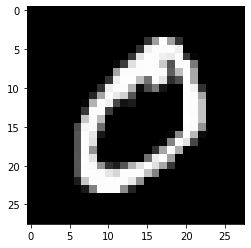

In [7]:
#This is how each image in the dataset looks
single_img = pixel_val[1, :].reshape(28,28)
plt.imshow(single_img, cmap='gray')

In [9]:
#Here I decomposed the dataseet into two components x and y using t-SNE decomposition
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_val[:3000, :])

In [21]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),
                      columns=["X","Y","targets"])
tsne_df.loc[:,"targets"] = tsne_df.astype(int)
#Finally converting the transformed_data to a data frame for visualization purpose

In [26]:
print(tsne_df)
#This is how the dataframe looks

              X          Y  targets
0     -5.281551 -28.952768       -5
1    -26.105896 -68.069321      -26
2    -42.503582  35.580391      -42
3     38.893967  26.663395       38
4    -14.770573  35.433247      -14
...         ...        ...      ...
2995   9.038110  58.850792        9
2996 -29.405334 -60.951775      -29
2997  13.466378  47.369007       13
2998  -2.435752   7.983772       -2
2999  -4.248264 -13.266910       -4

[3000 rows x 3 columns]


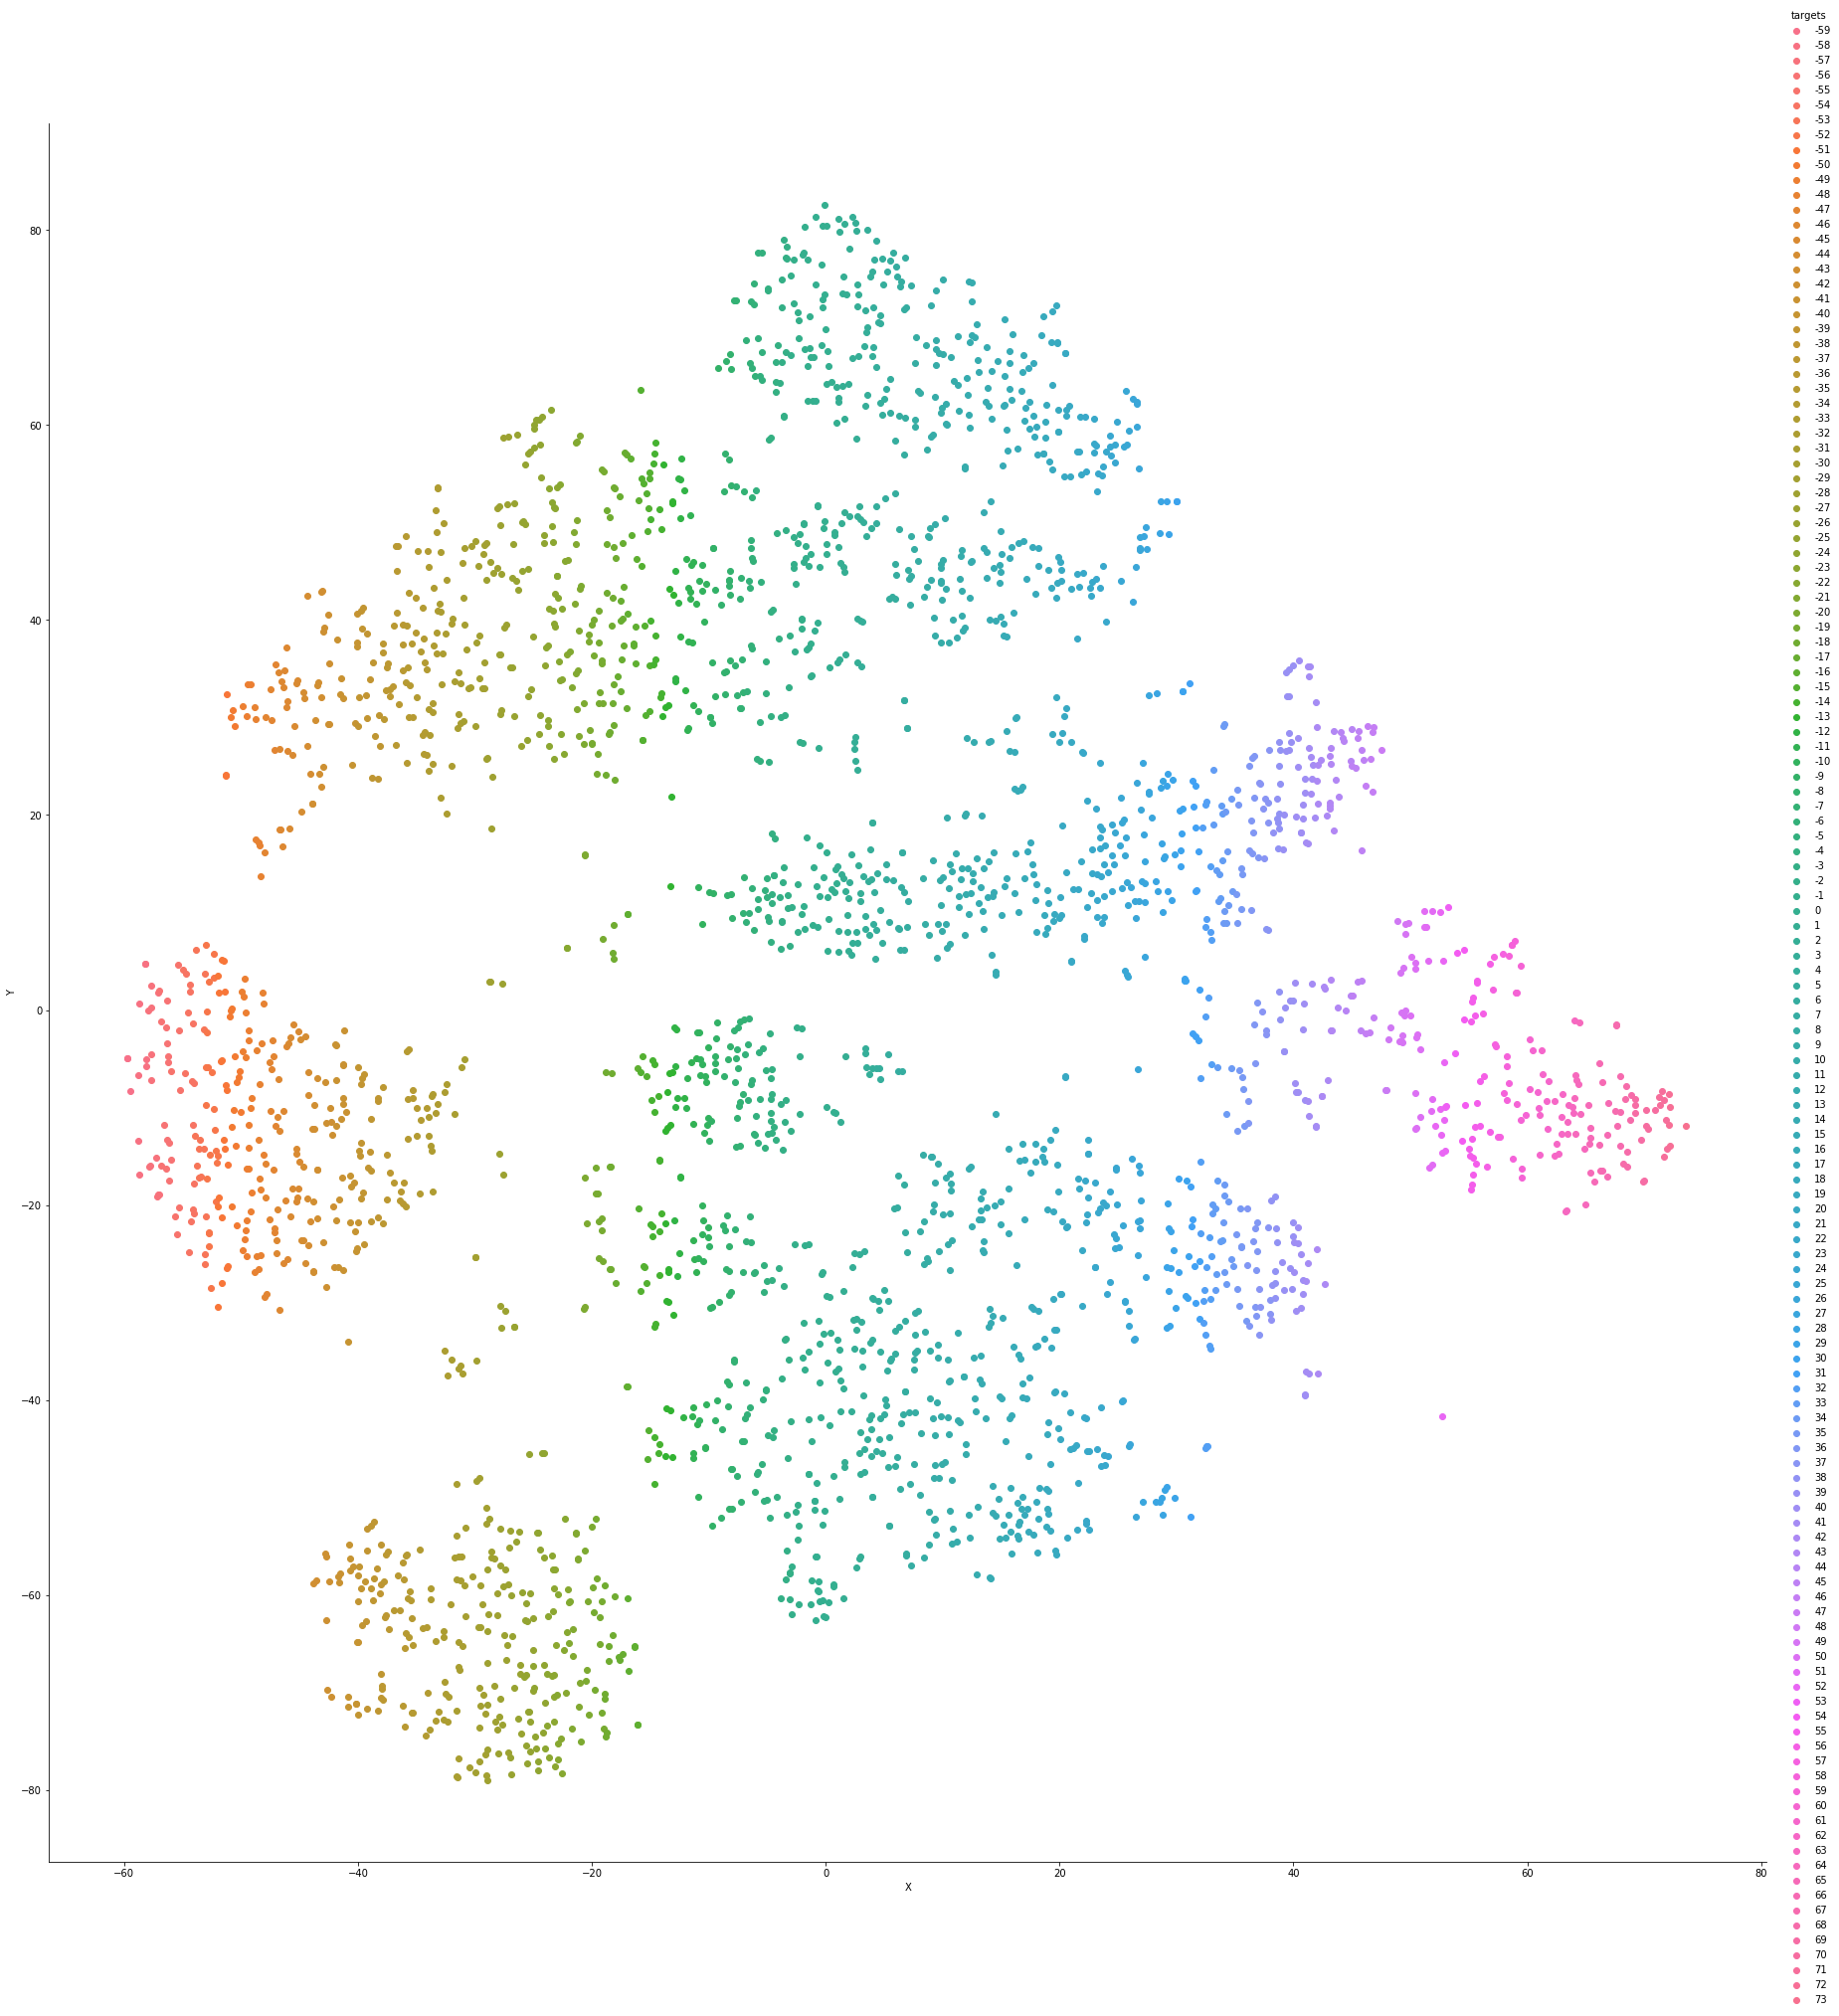

In [28]:
grid = sns.FacetGrid(tsne_df, hue="targets",size=25)
grid.map(plt.scatter, "X","Y").add_legend()
#Finally, visualisation of the dataset in an unsupervised form

---